In [ ]:
!nvidia-smi

Wed May 21 20:21:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
!pip install patool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.5/86.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
import patoolib

In [ ]:
patoolib.extract_archive("/content/data.zip")

INFO patool: Extracting /content/data.zip ...
INFO:patool:Extracting /content/data.zip ...
INFO patool: running /usr/bin/7z x -aou -o./Unpack_gvxrmieb -- /content/data.zip
INFO:patool:running /usr/bin/7z x -aou -o./Unpack_gvxrmieb -- /content/data.zip
INFO patool: ... /content/data.zip extracted to `data'.
INFO:patool:... /content/data.zip extracted to `data'.


'data'

In [ ]:
import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'valid/images',
      'nc': number_of_classes,
      'names': classes
  }

  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

path_to_classes_txt = '/content/data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: valid/images
nc: 13
names:
- Chest Press machine
- Lat Pull Down
- Seated Cable Rows
- arm curl machine
- chest fly machine
- chinning dipping
- lateral raises machine
- leg extension
- leg press
- reg curl machine
- seated dip machine
- shoulder press machine
- smith machine


In [ ]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 203MB/s]
Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, i

In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/valid/images save=True

Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,417,831 parameters, 0 gradients, 21.3 GFLOPs

image 1/1315 /content/data/valid/images/-0001_jpg.rf.3cdca9aded4be51f97ab731ae6917572.jpg: 640x640 1 smith machine, 17.2ms
image 2/1315 /content/data/valid/images/-0002_jpg.rf.03c502b9d40d817e0b671449648630a1.jpg: 640x640 1 smith machine, 15.7ms
image 3/1315 /content/data/valid/images/-0006_jpg.rf.d7aec97364ee0b22d283712a4738644f.jpg: 640x640 1 chinning dipping, 15.6ms
image 4/1315 /content/data/valid/images/-0010_jpg.rf.2ad3f5de1dda99d9459b65f611a5e118.jpg: 640x640 1 arm curl machine, 15.6ms
image 5/1315 /content/data/valid/images/-0010_jpg.rf.d107ab1ff52caf7a57f19de46a62f78f.jpg: 640x640 1 shoulder press machine, 15.6ms
image 6/1315 /content/data/valid/images/-0017_jpg.rf.44e5e3c7c1e21dd70518e429b98758d7.jpg: 640x640 1 lateral raises machine, 15.7ms
image 7/1315 /content/data/valid/images/-0021_jpg.rf.1eccd965829b43158

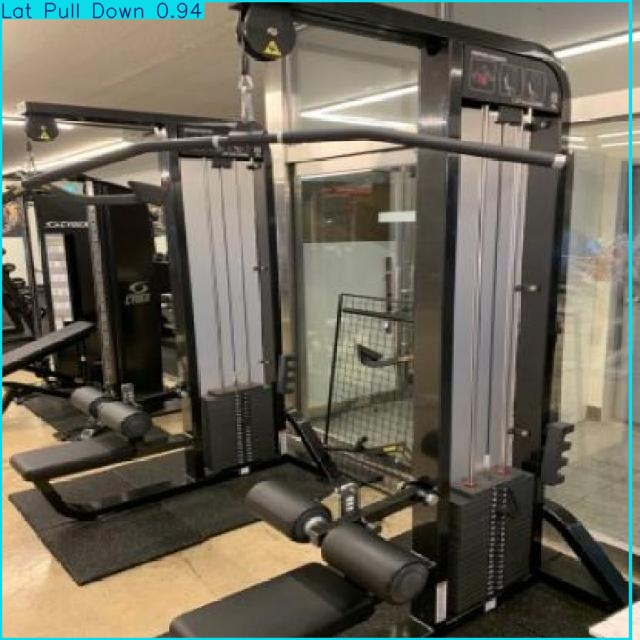

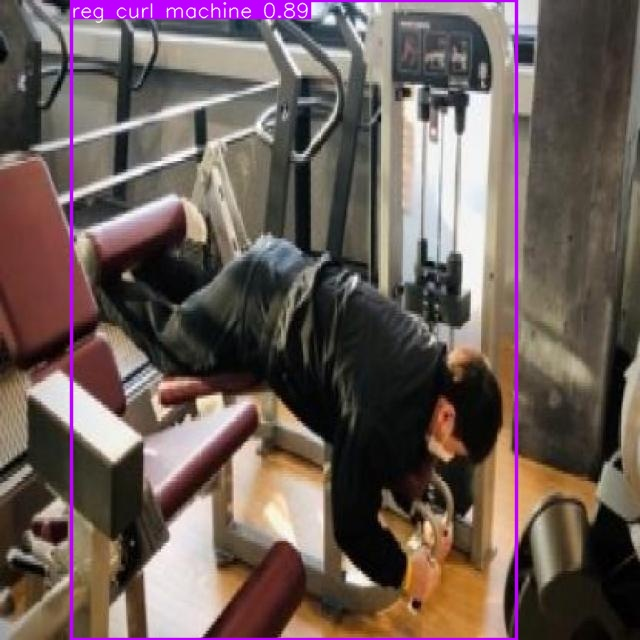

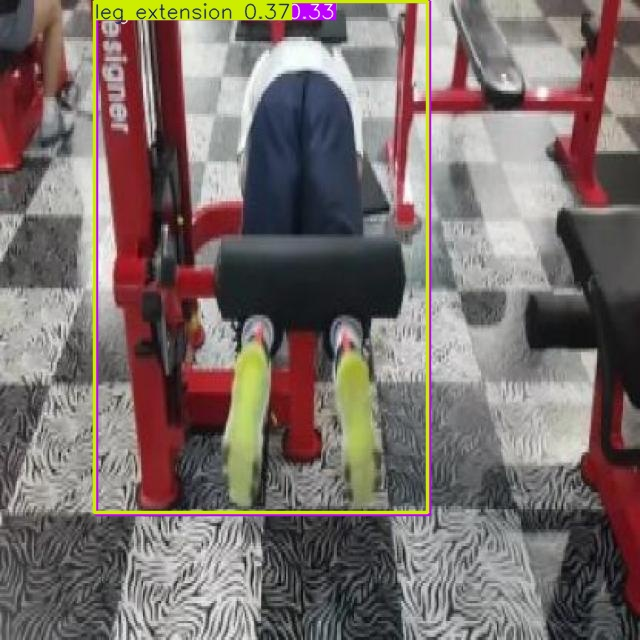

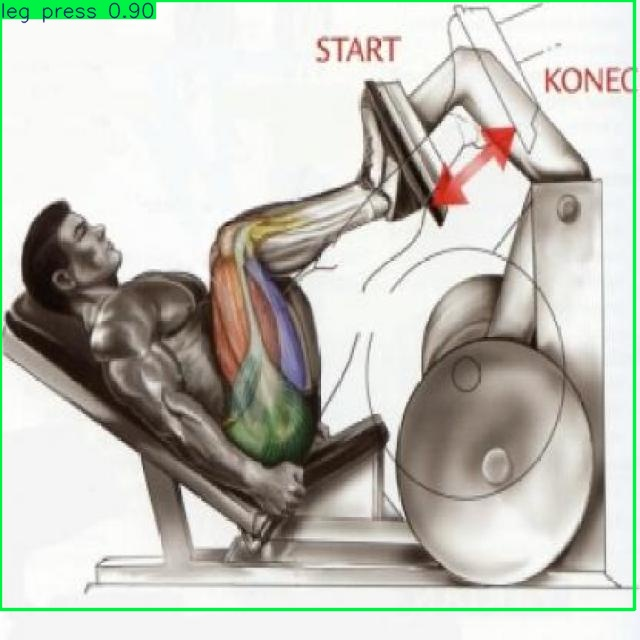

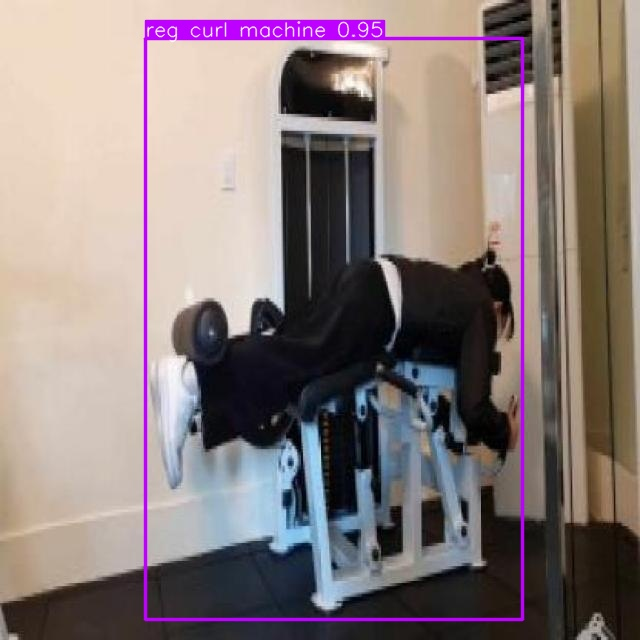

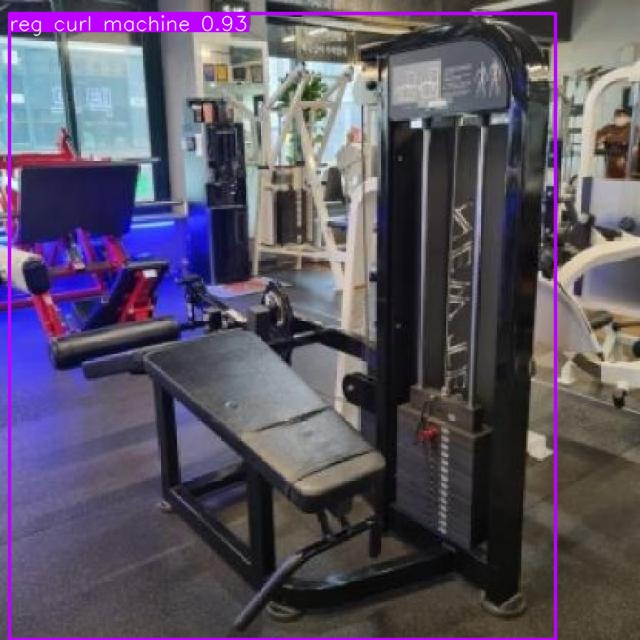

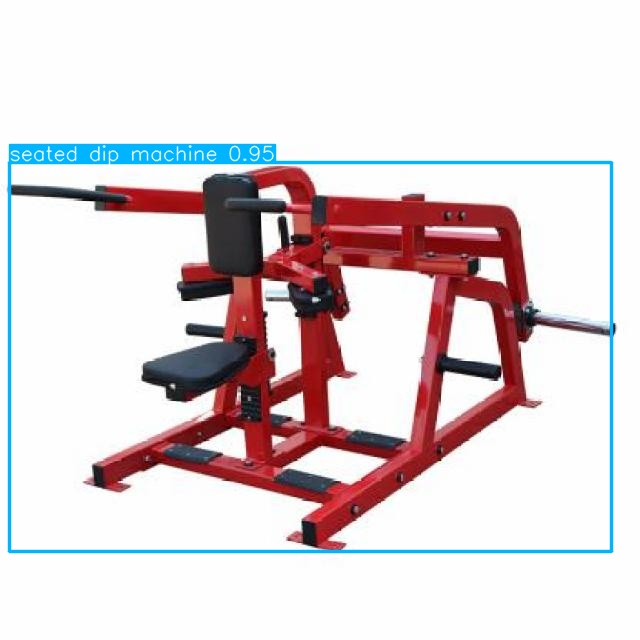

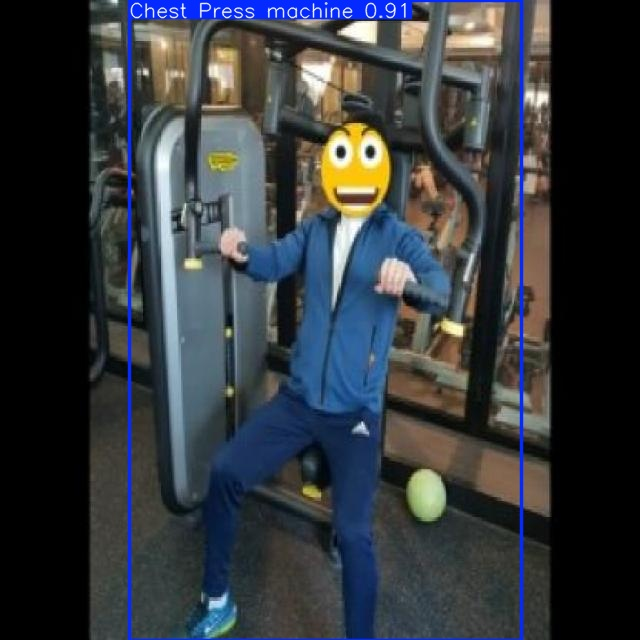

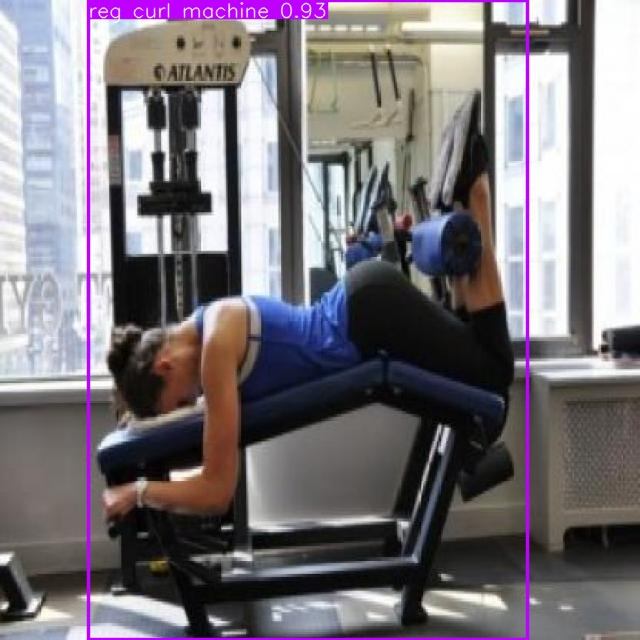

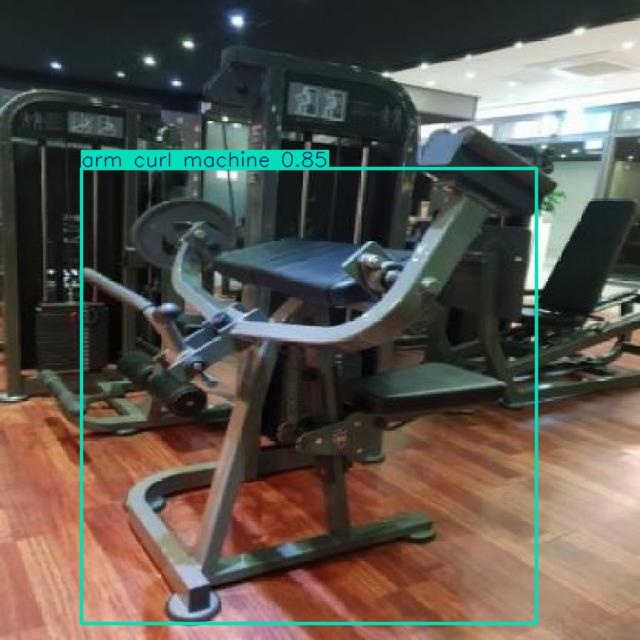

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/test/images save=True

Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,417,831 parameters, 0 gradients, 21.3 GFLOPs

image 1/2 /content/data/test/images/google_0028_jpg.rf.f3f4a5a84e2247b1af28e04675d55265.jpg: 640x640 1 leg extension, 15.7ms
image 2/2 /content/data/test/images/google_0046_jpg.rf.71c0286abca7566a296ff1c03617d513.jpg: 640x640 1 leg extension, 15.7ms
Speed: 3.0ms preprocess, 15.7ms inference, 72.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


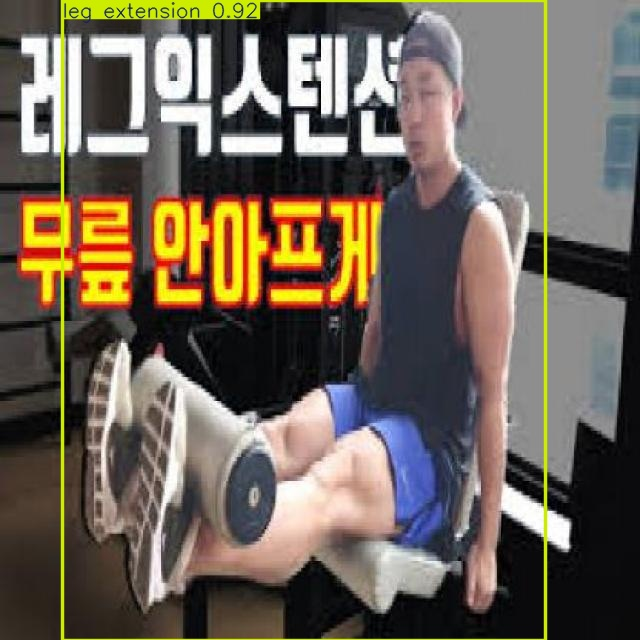

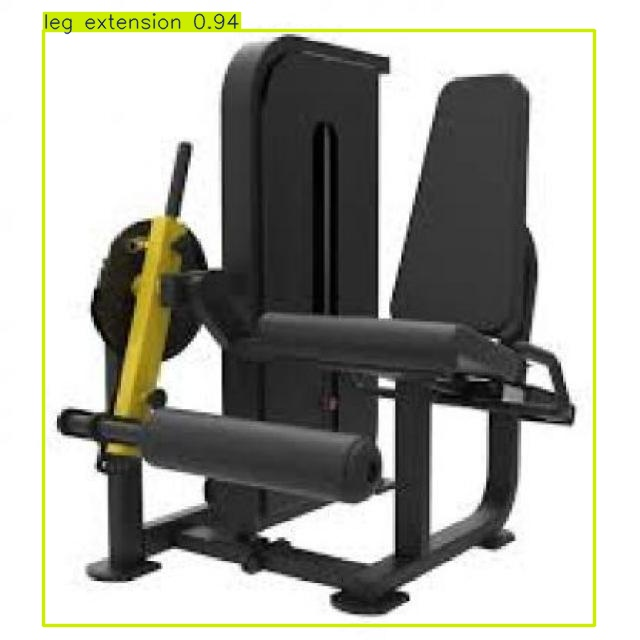

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


In [ ]:
from ultralytics import YOLO
model = YOLO("/content/runs/detect/train/weights/best.pt")
result=model("/content/4.jpg")



image 1/1 /content/4.jpg: 640x480 1 leg press, 50.1ms
Speed: 3.2ms preprocess, 50.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
for r in result:
    if len(r.boxes) > 0:
        # Get predicted class indices
        predicted_classes = r.boxes.cls.cpu().numpy()

        # Convert to class names
        class_names = [r.names[int(cls)] for cls in predicted_classes]

        print(f"Predicted classes: {class_names}")
    else:
        print("No detections")

Predicted classes: ['leg press']
